In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset.csv")
print(df)


          game_id             start_utc  duration            queue  \
0      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
1      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
2      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
3      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
4      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
...           ...                   ...       ...              ...   
68295  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   
68296  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   
68297  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   
68298  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   
68299  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   

      platform_id  map_id game_mode   game_version  participant_id  \
0            EUN1      11   CLASSIC  15.3.656.4086               1   
1            EUN1  

In [24]:
performance_cols = [
    'kills',
    'deaths',
    'assists',
    'kda_ratio',
    'kill_participation',
    'gold_per_min',
    'damage_champ_per_min',
    'vision_score'
]

df_norm = df.copy()

for col in performance_cols:
    df_norm[col] = (
        (df_norm[col] - df_norm[col].mean()) /
        df_norm[col].std()
    )
print(df_norm)

          game_id             start_utc  duration            queue  \
0      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
1      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
2      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
3      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
4      3746362208  2025-02-19T23:59:41Z      2551  Ranked Solo/Duo   
...           ...                   ...       ...              ...   
68295  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   
68296  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   
68297  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   
68298  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   
68299  3746063215  2025-02-19T15:31:07Z      1802  Ranked Solo/Duo   

      platform_id  map_id game_mode   game_version  participant_id  \
0            EUN1      11   CLASSIC  15.3.656.4086               1   
1            EUN1  

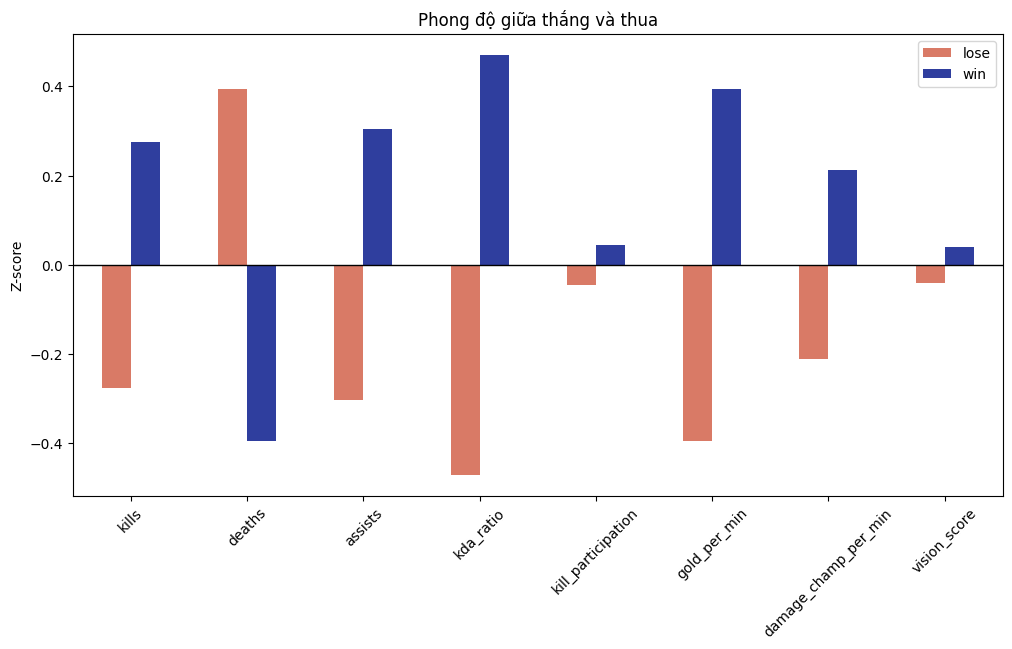

In [47]:
z_cols = [c for c in performance_cols]

df_perf_z = df_norm[z_cols + ['win']].dropna()

mean_perf_z = df_perf_z.groupby('win').mean()

mean_perf_z.T.plot(
    kind='bar',
    figsize=(12,6),
    color=['#d97a66', '#2f3e9e']
)
plt.axhline(0, color='black', linewidth=1, label='_nolegend_')
plt.title("Phong độ giữa thắng và thua")
plt.ylabel("Z-score")
plt.xticks(rotation=45)
plt.legend(["lose","win"])
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_26356\783144506.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\admin\AppData\Local\Temp\ipykernel_26356\783144506.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


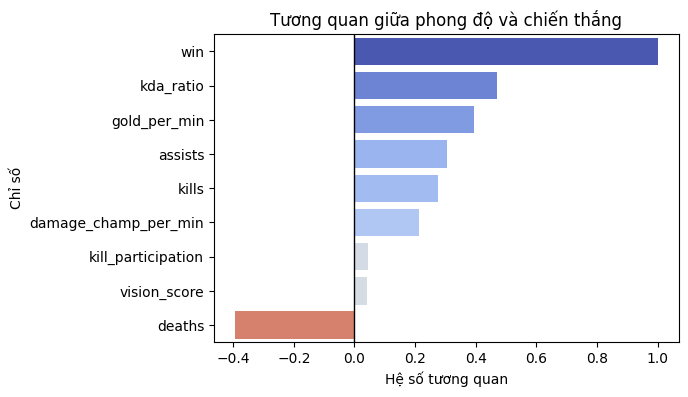

In [46]:
corr = df_perf_z.corr()['win'].sort_values(ascending=False)
plt.figure(figsize=(6,4))
norm = plt.Normalize(-0.6, 0.6)
colors = plt.cm.coolwarm_r(norm(corr.values))
sns.barplot(
    x=corr.values,
    y=corr.index,
    palette=colors
)
plt.axvline(0, color='black', linewidth=1)
plt.title("Tương quan giữa phong độ và chiến thắng")
plt.xlabel("Hệ số tương quan")
plt.ylabel("Chỉ số")
plt.show()

In [27]:
lanes = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'SUPPORT']

df_lane = df_norm[
    df_norm['position'].isin(lanes)
][
    [
        'game_id',
        'position',
        'champion_name',
        'win',
        'gold_per_min',
        'kills',
        'deaths',
        'kda_ratio',
        'kill_participation',
        'damage_champ_per_min',
        'vision_score'
    ]
].dropna()
print(df_lane)

          game_id position champion_name   win  gold_per_min     kills  \
0      3746362208      TOP        Aatrox  True      0.588854  2.278013   
1      3746362208   JUNGLE          Kayn  True     -0.048169  0.790025   
2      3746362208   MIDDLE           Lux  True      0.276932  1.852873   
3      3746362208   BOTTOM         Varus  True      1.198639  3.128291   
4      3746362208  SUPPORT        Thresh  True     -1.286776 -0.485393   
...           ...      ...           ...   ...           ...       ...   
68295  3746063215      TOP      Renekton  True      1.562751  0.364885   
68296  3746063215   JUNGLE        Khazix  True      1.321027  1.427734   
68297  3746063215   MIDDLE        Xerath  True      0.397251  1.427734   
68298  3746063215   BOTTOM         Vayne  True      0.217305 -0.697963   
68299  3746063215  SUPPORT         Karma  True     -1.067191 -0.697963   

         deaths  kda_ratio  kill_participation  damage_champ_per_min  \
0     -1.006777   2.245222            0

In [28]:
lane_pairs = (
    df_lane
    .groupby(['game_id', 'position'])
    .filter(lambda x: len(x) == 2)
    .sort_values(['game_id', 'position'])
)

lane_pairs['opponent_gpm'] = (
    lane_pairs
    .groupby(['game_id', 'position'])['gold_per_min']
    .transform(lambda x: x[::-1].values)
)

lane_pairs['gpm_diff'] = (
    lane_pairs['gold_per_min'] - lane_pairs['opponent_gpm']
)
lane_pairs['lane_result'] = lane_pairs['gpm_diff'].apply(
    lambda x: 'Win lane' if x > 0 else 'Lose lane'
)

print(lane_pairs)

          game_id position champion_name    win  gold_per_min     kills  \
833    3724539056   BOTTOM       Caitlyn  False     -1.023344 -1.123102   
838    3724539056   BOTTOM   MissFortune   True     -0.001829  0.790025   
831    3724539056   JUNGLE         Amumu  False     -0.693173 -0.485393   
836    3724539056   JUNGLE       Karthus   True      1.478903  1.215164   
832    3724539056   MIDDLE         Yasuo  False     -0.601717 -1.123102   
...           ...      ...           ...    ...           ...       ...   
47257  7312932378   MIDDLE           Mel  False      0.261640  0.152316   
47254  7312932378  SUPPORT         Milio   True     -0.936641 -1.123102   
47259  7312932378  SUPPORT    Blitzcrank  False     -1.508934 -1.123102   
47250  7312932378      TOP         Nasus   True      0.666422 -0.697963   
47255  7312932378      TOP         Garen  False     -0.181692 -0.485393   

         deaths  kda_ratio  kill_participation  damage_champ_per_min  \
833    0.822047  -0.779991 

In [29]:
lose_lane = lane_pairs[lane_pairs['lane_result'] == 'Lose lane']

lose_lane_win  = lose_lane[lose_lane['win'] == 1]
lose_lane_lose = lose_lane[lose_lane['win'] == 0]

compare_z_cols = [
    'deaths',
    'kill_participation',
    'vision_score',
    'damage_champ_per_min'
]

summary_z = pd.DataFrame({
    'Lose lane & Win game': lose_lane_win[compare_z_cols].mean(),
    'Lose lane & Lose game': lose_lane_lose[compare_z_cols].mean()
})

summary_z.round(2)
print(summary_z)

                      Lose lane & Win game  Lose lane & Lose game
deaths                            0.120210               0.421040
kill_participation               -0.334042              -0.182108
vision_score                      0.063108              -0.066975
damage_champ_per_min             -0.141785              -0.379682


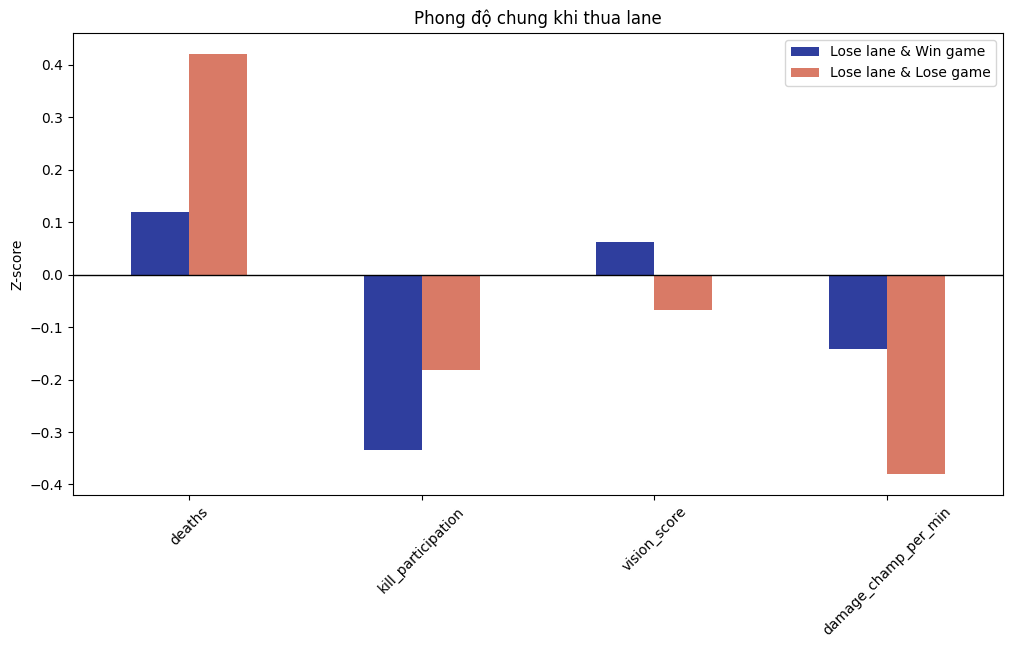

In [49]:
summary_z.plot(
    kind='bar',
    figsize=(12,6),
    color=[ '#2f3e9e','#d97a66']
)

plt.axhline(0, color='black', linewidth=1)
plt.title("Phong độ chung khi thua lane")
plt.ylabel("Z-score")
plt.xticks(rotation=45)
plt.show()

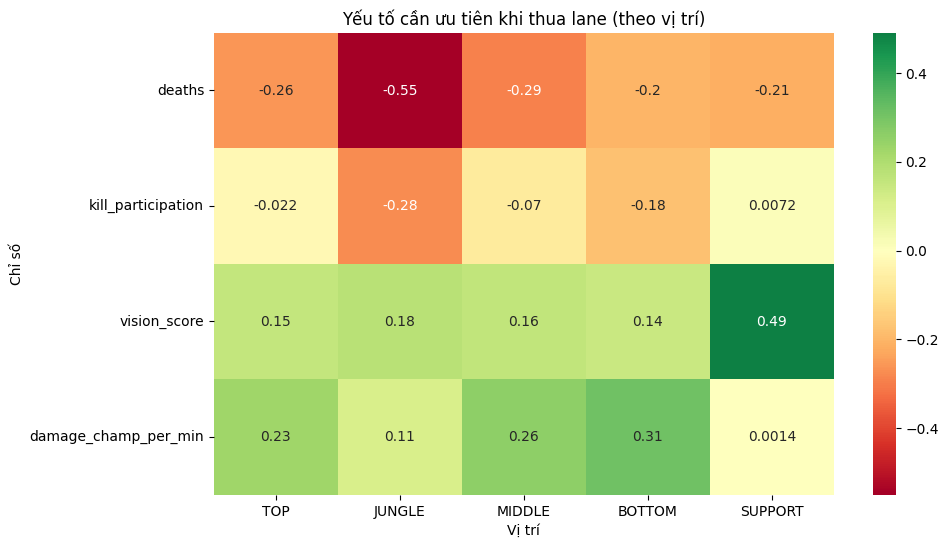

In [31]:
importance_by_lane = {}

for lane in lanes:
    df_lane_lose = lose_lane[lose_lane['position'] == lane]

    win_mean = df_lane_lose[df_lane_lose['win'] == 1][compare_z_cols].mean()
    lose_mean = df_lane_lose[df_lane_lose['win'] == 0][compare_z_cols].mean()

    importance_by_lane[lane] = (win_mean - lose_mean)

importance_matrix = pd.DataFrame(importance_by_lane)

plt.figure(figsize=(10,6))
sns.heatmap(importance_matrix, annot=True, center=0, cmap="RdYlGn")
plt.title("Yếu tố cần ưu tiên khi thua lane (theo vị trí)")
plt.ylabel("Chỉ số")
plt.xlabel("Vị trí")
plt.show()
